# `Brain Tumor Detection`

In [74]:
import cv2 as cv2 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [75]:
dataset = r'E:\brain_tumor_dataset'
yes_path = r'E:\brain_tumor_dataset\yes'
no_path = r'E:\brain_tumor_dataset\no'

In [76]:
img = cv2.imread(yes_path+'\\y22.jpg')
cv2.imshow('img',img)
cv2.waitKey(0)

-1

(380, 294, 3)

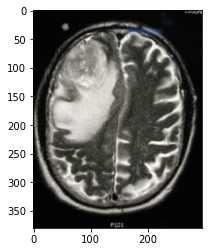

In [77]:
plt.imshow(img)
img.shape

#### `These colors are formed with the help of RGB`
#### `All images are of different dimensions`

In [78]:
vals = [yes_path, no_path]
print("The no of images in yes path is", os.listdir(vals[0]).__len__())
print("The number of images in no path is {}".format(os.listdir(vals[1]).__len__()))

The no of images in yes path is 155
The number of images in no path is 98


#### `arranging path and labels in dataframe`
### `Annotated the image`

In [79]:
pathdir = [yes_path, no_path]
classes = ['yes', 'no']
filepaths = []
labels=[]
for i, j in zip(pathdir, classes):
    filelist = os.listdir(i)
    print(filelist)
    for vals in filelist:
        x = os.path.join(i, vals)
        filepaths.append(x)
        labels.append(j)
print(filepaths.__len__(), labels.__len__())

['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg', 'Y103.jpg', 'Y104.jpg', 'Y105.jpg', 'Y106.jpg', 'Y107.jpg', 'Y108.jpg', 'Y109.JPG', 'Y11.jpg', 'Y111.JPG', 'Y112.JPG', 'Y113.JPG', 'Y114.JPG', 'Y115.JPG', 'Y116.JPG', 'Y117.JPG', 'Y12.jpg', 'Y120.JPG', 'Y13.jpg', 'Y14.jpg', 'Y146.JPG', 'Y147.JPG', 'Y148.JPG', 'Y15.jpg', 'Y153.jpg', 'Y154.jpg', 'Y155.JPG', 'Y156.JPG', 'Y157.JPG', 'Y158.JPG', 'Y159.JPG', 'Y16.JPG', 'Y160.JPG', 'Y161.JPG', 'Y162.jpg', 'Y163.JPG', 'Y164.JPG', 'Y165.JPG', 'Y166.JPG', 'Y167.JPG', 'Y168.jpg', 'Y169.jpg', 'Y17.jpg', 'Y170.JPG', 'Y18.JPG', 'Y180.jpg', 'Y181.jpg', 'Y182.JPG', 'Y183.jpg', 'Y184.JPG', 'Y185.jpg', 'Y186.jpg', 'Y187.jpg', 'Y188.jpg', 'Y19.JPG', 'Y192.JPG', 'Y193.JPG', 'Y194.jpg', 'Y195.JPG', 'Y2.jpg', 'Y20.jpg', 'Y21.jpg', 'Y22.jpg', 'Y23.JPG', 'Y24.jpg', 'Y242.JPG', 'Y243.JPG', 'Y244.JPG', 'Y245.jpg', 'Y246.JPG', 'Y247.JPG', 'Y248.JPG', 'Y249.JPG', 'Y25.jpg', 'Y250.jpg', 'Y251.JPG', 'Y252.jpg', 'Y253.JPG', 'Y254.jpg', 'Y255.JPG', 'Y256.JPG',

In [80]:
filepaths[0:5]

['E:\\brain_tumor_dataset\\yes\\Y1.jpg',
 'E:\\brain_tumor_dataset\\yes\\Y10.jpg',
 'E:\\brain_tumor_dataset\\yes\\Y100.JPG',
 'E:\\brain_tumor_dataset\\yes\\Y101.jpg',
 'E:\\brain_tumor_dataset\\yes\\Y102.jpg']

In [81]:
labels[0:5]

['yes', 'yes', 'yes', 'yes', 'yes']

In [82]:
dataset = list(zip(filepaths, labels))
pathframe = pd.DataFrame(dataset, columns = ['filepaths','labels'])

In [83]:
pathframe.head()

,filepaths,labels
0,E:\brain_tumor_dataset\yes\Y1.jpg,yes
1,E:\brain_tumor_dataset\yes\Y10.jpg,yes
2,E:\brain_tumor_dataset\yes\Y100.JPG,yes
3,E:\brain_tumor_dataset\yes\Y101.jpg,yes
4,E:\brain_tumor_dataset\yes\Y102.jpg,yes


In [84]:
pathframe.labels.value_counts()

yes    155
no      98
Name: labels, dtype: int64

### `Display random 20 images`

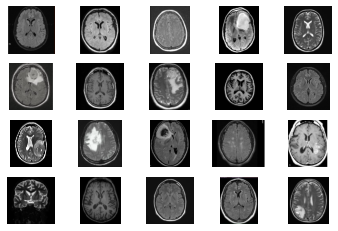

In [85]:
for i in range(0, 20):
    vals = np.random.randint(1, len(pathframe))
    plt.subplot(4,5, i+1)
    plt.imshow(cv2.imread(pathframe.filepaths[vals]))
    plt.axis('off')
plt.show()

### `Splitting the data into test and train`
### `Model only have prior knowledge to train data`

In [86]:
Train, Test = train_test_split(pathframe, train_size=0.90, random_state=0)
Train_new, valid = train_test_split(Train, train_size=0.90, random_state=0)
print(Train.shape, Test.shape, Train_new.shape, valid.shape)

(227, 2) (26, 2) (204, 2) (23, 2)


### `Image Data Generator/Preprocessing/Data Augmentation`
### `We need to a add bit of noise in the given images`

In [87]:
train_datagen = ImageDataGenerator(rescale=1.0/255,rotation_range= 40, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,
                                  zoom_range=0.2,horizontal_flip=True, vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

### `Applying the preprocessing`

In [88]:
train_gen = train_datagen.flow_from_dataframe(dataframe=Train_new, x_col='filepaths', y_col='labels', batch_size=16,
                                             target_size=(150, 150), class_mode='binary', shuffle=True)
valid_gen  = train_datagen.flow_from_dataframe(dataframe=valid, x_col='filepaths', y_col='labels', batch_size=16,
                                              target_size=(150,150), class_mode='binary', shuffle=True)
test_gen = test_datagen.flow_from_dataframe(dataframe=Test, x_col='filepaths', y_col = 'labels', batch_size=16,
                                           target_size=(150,150), class_mode='binary', shuffle=False)

Found 204 validated image filenames belonging to 2 classes.
Found 23 validated image filenames belonging to 2 classes.
Found 26 validated image filenames belonging to 2 classes.


In [89]:
print(train_gen.class_indices)
print(train_gen[0][0].shape)

{'no': 0, 'yes': 1}
(16, 150, 150, 3)


### `~16 images/batch, each image is 150,150,3, there are total number of 16 batches`
### `remove rescale from image data generator to view the images`
### `View the distortions we have created`
### `batch wise`

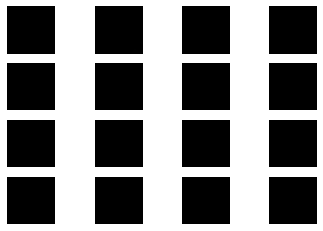

In [90]:
for i in range(0, 16):
    val = train_gen[0][0][i]
    vals = val.astype('uint8')
    plt.subplot(4,4, i+1)
    plt.imshow(vals)
    plt.axis('off')
plt.show()

### `single image with different combinations`
### `Not recommended to use different varients of single image, it will just add noise in different ways`

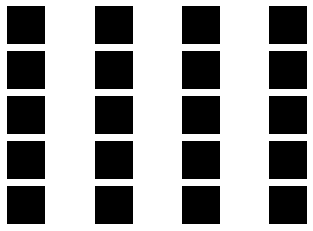

In [91]:
for i in range(0, 20):
    val = train_gen[0][0][0]
    vals = val.astype('uint8')
    plt.subplot(5,4, i+1)
    plt.imshow(vals)
    plt.axis('off')
plt.show()

## `Model Building/Transfer Learning`:
### 1. `LeNet`: not used now days
- Discovered in 1990's
![](https://www.datasciencecentral.com/wp-content/uploads/2021/10/1lvvWF48t7cyRWqct13eU0w.jpeg)

### 2. `Alexnet`:
- Discovered in 2000's
![](https://i.stack.imgur.com/DIQWD.png)
- consume 227,227,3
- goes to filter 11,11,3
- where striding = 4(reducing by 4 times), no of kernels=96
- output is layer1 of 55,55,96
- it goes to filter 3,3,3, striding=2, no of kernels/filters=96
- output is layer1 of 27,27,96
- it goes to filter 5,5,3, padding=2, striding=1, k=256
- output is layer3 of 27,27,256
- it goes to filter 3,3,3, striding=2, k=256
- output is layer4 of 13,13,256
- it goes to filter 3,3,3, padding=1, striding=1, k=388
- output is layer5 of 13,13,388
- it goes to filter 3,3,3, padding=1, k=256
- output is layer6 of 13,13,256
- it goes to filter 3,3,3, striding=2, k=256
- output is layer7 of 6,6,256
- it goes to flatten(layer8) the array of 6,6,256=9216

#### `From Flatten ANN starts`
- reduce it to half(layer9)=4096
- remains same(layer10)
- pass it to softmax A.F(output layer)

### 3. `VGG16`:
![](https://miro.medium.com/max/1400/1*NNifzsJ7tD2kAfBXt3AzEg.png)
- designed by google
- 16 means 16 layers
- consume 224,224,3
- maxpooling reduce size by half

### 4. `VGG19`:
![](https://miro.medium.com/max/1200/1*46a2V8mEuSD83ttIFqiAZQ.jpeg)

### 5. `Inception`:
![](https://miro.medium.com/max/1656/1*uW81y16b-ptBDV8SIT1beQ.png)
- Designed by Google
- 40+ layers model.
- If the image is scaling very large.
- there are 9 same slices in inception.
![](https://i.ytimg.com/vi/KfV8CJh7hE0/maxresdefault.jpg)
- 1,1 filters are called **bottle-neck** filters, these filters helps to map every pixel with certain weights.
- 1,1 is enhancing feature and 3,3 is extracting feature.
- upper-most 1,1 filter is to hold context till last, to prevent feature loss.
- The same layer is repeating 9 times.
- There are some branches b1,b2,b3. You sometimes do not need such a long inception network. Here we can get out by branches.
- Designed in 2018.

### 6. `ResNet`:
- 50 layers
- [ResNet](https://www.analyticsvidhya.com/blog/2021/06/build-resnet-from-scratch-with-python/)
- [An Overview of ResNet and its Variants](https://www.analyticsvidhya.com/blog/2021/06/build-resnet-from-scratch-with-python/)
![](https://miro.medium.com/max/1144/1*2ns4ota94je5gSVjrpFq3A.png)
- Assumption: It takes large image, HD images

In [92]:
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet',input_shape=(150,150,3),include_top=False) 
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

219070464/219055592 [==============================] - 20s 0us/step


### `Batch Normalization`:
- When we are dealing with weights,your weights should get normalized.

In [93]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 3, 3, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               196736    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 54,533,601
Trainable params: 54,473,057
No

In [94]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_gen,validation_data=valid_gen,epochs=5,verbose=2)

Epoch 1/5
13/13 - 188s - loss: 0.6615 - accuracy: 0.6814 - val_loss: 95.2564 - val_accuracy: 0.4348 - 188s/epoch - 14s/step
Epoch 2/5
13/13 - 109s - loss: 0.3399 - accuracy: 0.8284 - val_loss: 9.4650 - val_accuracy: 0.5652 - 109s/epoch - 8s/step
Epoch 3/5
13/13 - 112s - loss: 0.2505 - accuracy: 0.9167 - val_loss: 171.8087 - val_accuracy: 0.4348 - 112s/epoch - 9s/step
Epoch 4/5
13/13 - 105s - loss: 0.4488 - accuracy: 0.8529 - val_loss: 103.6757 - val_accuracy: 0.4348 - 105s/epoch - 8s/step
Epoch 5/5
13/13 - 129s - loss: 0.4401 - accuracy: 0.8480 - val_loss: 7.4992 - val_accuracy: 0.5217 - 129s/epoch - 10s/step


## `END -----------------------------------------`